# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

## Mathematical bases

- Complex Variable Theory.
- Differential equations.
- Laplace transform.
- Theory of matrices.
- Bode diagrams.

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

### Complex Variable

The complex variable $s$ has two components:

- $\sigma$: The real part
- $\omega$: The imaginary or complex part

So, $s = \sigma + j \omega$.

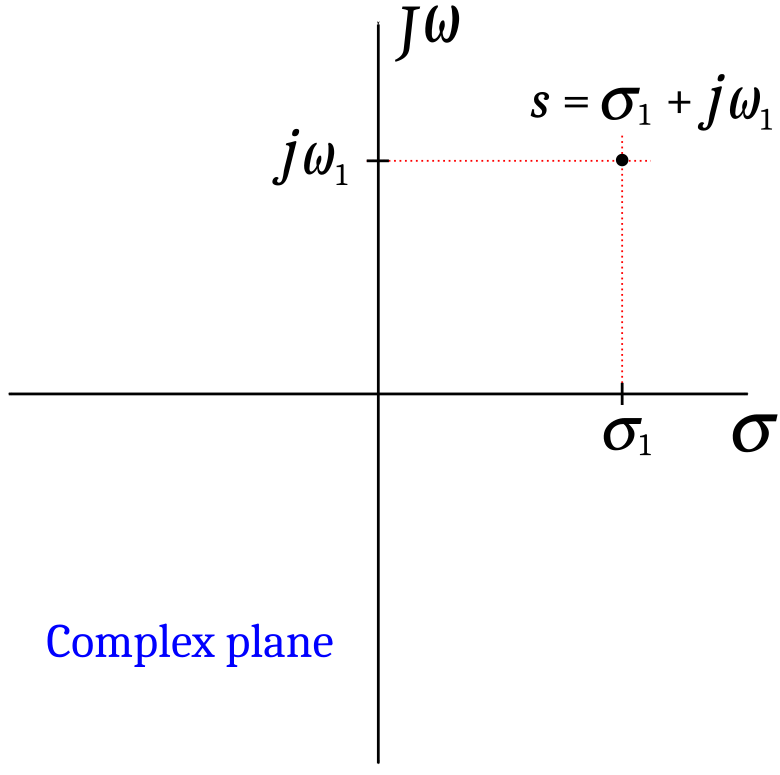

In [4]:
from IPython.display import SVG
SVG(valid_path + 'intro_fig7.svg')

### Functions of a Complex Variable

$G(s)$ is a function of the complex variable $s$, when for each value of $s$ there exists a corresponding value (or several) of $G(s)$.

$$G(s)=Re (G) + J Im (G)$$

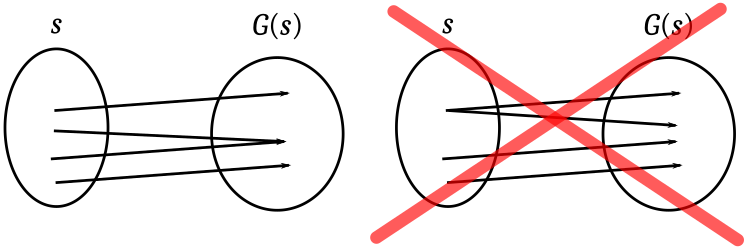

In [5]:
SVG(valid_path + 'intro_fig8.svg')

For example:

$$G(s)=\frac{1}{s(s+1)}$$

$\Longrightarrow\;$ For each $s$ value there is **only** one corresponding value of $G(s)$.

$\Longrightarrow\;$ But the reverse is **not true**, the values of $G(s)$ can be reflections of different points in $s$, for example:

In [6]:
SVG(valid_path + 'intro_fig9.svg')

### Analytical function

$G(s)$ is an analytical function in a region of $s$ when the **function and all its derivatives** exist in the region.

For example:

$$G(s)=\frac{1}{s(s+1)}$$

$\Longrightarrow\;$ It is analytical at all points of the s-plane except at $s=0$ and $s=-1$, where the function is infinite.

For example:

$$G(s)=s+3$$

$\Longrightarrow\;$ It is analytical in all $s$.

### Singularities and poles of a function

$\Longrightarrow\;$ **Singularities:** Points in $s$ where neither the function nor its derivatives exist.

$\Longrightarrow\;$ **Pole:** Most common singularity. Corresponds to the values of $s$ where the denominator of the transfer function becomes zero. They are the roots of the denominator.

For example:

$$G\left(s\right)=\frac{10\left(s+2\right)}{s\left(s+1\right)\left(s+3\right)^{2}}$$

$\Longrightarrow\;$ Single pole in $s=0$.

$\Longrightarrow\;$ Single pole in $s=-1$.

$\Longrightarrow\;$ Pole of order 2 in $s=-3$.

$\Longrightarrow\;$ The function is analytical in $s$, with the exception of the poles.

### Zeros of a function

These are the values of $s$ where the numerator of the function becomes zero. Roots of the numerator.

For example:

$$G\left(s\right)=\frac{10\left(s+2\right)}{s\left(s+1\right)\left(s+3\right)^{2}}$$

$\Longrightarrow\;$ Simple finite zero in $s=-2$.

In a transfer function the total number of poles **is equal** to the total number of zeros.

$\Longrightarrow\;$ Three infinite zeros ($s\longrightarrow\infty$).

### Differential equations

These are equations containing derivatives and integrals.

$\Longrightarrow\;$ **Ordinary linear equations**

For example: Serial RLC electrical network

$$R\,i\left(t\right)+L\frac{d\,i\left(t\right)}{dt}+\frac{1}{C}\int i\left(t\right)\,dt=v\left(t\right)$$

In [7]:
SVG(valid_path + 'intro_fig10.svg')

It is an integrodifferential equation or simply a differential equation, in this case of second order. The general form of the equation is:

$$a_{n+1}\frac{d^{n}\,y\left(t\right)}{dt^{n}}+a_{n}\frac{d^{n-1}\,y\left(t\right)}{dt^{n-1}}+\cdots+a_{2}\frac{d\,y\left(t\right)}{dt}+a_{1}y\left(t\right)=f\left(t\right)$$

When the coefficients $a_1$, $a_2$, ..., $a_{n+1}$ are not functions of $y(t)$, then it is an **Ordinary Differential Equation**.

$\Longrightarrow\;$ The models to be used in the course are calculated assuming **concentrated parameters**, so we will only use ordinary differential equations.

### First order differential equations

An n-order differential equation can be decomposed into $n$ first-order differential equations, which are generally simpler to solve.

For example:

$$M\frac{d^{2}\,y\left(t\right)}{dt^{2}}+B\frac{d\,y\left(t\right)}{dt}+Ky\left(t\right)=f\left(t\right)$$

If:

$$x_{1}\left(t\right)=y\left(t\right)$$

and:

$$x_{2}\left(t\right)=\frac{d\,y\left(t\right)}{dt}=\frac{d\,x_{1}\left(t\right)}{dt}$$

$$\Longrightarrow\;M\frac{d\,x_{2}\left(t\right)}{dt}+B\,x_{2}\left(t\right)+K\,x_{1}\left(t\right)=f\left(t\right)$$

$$\Longrightarrow\;M\frac{d\,x_{2}\left(t\right)}{dt}=-K\,x_{1}\left(t\right)-B\,x_{2}\left(t\right)+f\left(t\right)$$

And the two first-order differential equations look like:

$$\left\{ \begin{array}{c}
\frac{dx_{1}\left(t\right)}{dt}=x_{2}\left(t\right)\\
\frac{dx_{2}\left(t\right)}{dt}=-\frac{K}{M}x_{1}\left(t\right)-\frac{B}{M}x_{2}\left(t\right)+\frac{1}{M}f\left(t\right)
\end{array}\right.$$

For the case of the serial RLC circuit:

$$\Longrightarrow\;x_{1}\left(t\right)=\int i\left(t\right)\,dt$$

$$\Longrightarrow\;x_{2}\left(t\right)=i\left(t\right)=\frac{dx_{1}\left(t\right)}{dt}$$

$$\Longrightarrow\;R\,x_{2}\left(t\right)+L\frac{dx_{2}\left(t\right)}{dt}+\frac{1}{C}x_{1}\left(t\right)=v\left(t\right)$$

And the two first-order differential equations look like:

$$\left\{ \begin{array}{c}
\frac{dx_{1}\left(t\right)}{dt}=x_{2}\left(t\right)\\
\frac{dx_{2}\left(t\right)}{dt}=-\frac{1}{LC}x_{1}\left(t\right)-\frac{R}{L}x_{2}\left(t\right)+\frac{1}{L}v\left(t\right)
\end{array}\right.$$

These equations are known as **state equations**, and the variables $x_1$, $x_2$, ..., $x_n$ are called **state variables**.